In [1]:
import monai
import pydicom
from glob import glob
import pathlib
import matplotlib.pyplot as plt

# Getting the list of dicom images

In [5]:
project_ID = 'demo1'
experiment_ID = 'LUNG1-001'
scan_ID = '0'

mode = 'local'
if mode == 'local':
    path = pathlib.Path(f'xnat-data/archive/{project_ID}/arc001/{experiment_ID}/SCANS/{scan_ID}/DICOM/').absolute()
else:
    path = pathlib.Path(f'/data/projects/{project_ID}/experiments/{experiment_ID}/SCANS/{scan_ID}/DICOM/').absolute()

files = list(path.glob('*.dcm'))
files[:3]

[PosixPath('/home/artin/Documents/xnat/xnat-docker-compose/xnat-data/archive/demo1/arc001/LUNG1-001/SCANS/0/DICOM/1-112.dcm'),
 PosixPath('/home/artin/Documents/xnat/xnat-docker-compose/xnat-data/archive/demo1/arc001/LUNG1-001/SCANS/0/DICOM/1-052.dcm'),
 PosixPath('/home/artin/Documents/xnat/xnat-docker-compose/xnat-data/archive/demo1/arc001/LUNG1-001/SCANS/0/DICOM/1-024.dcm')]

 # Loading and visualizing the dicom image

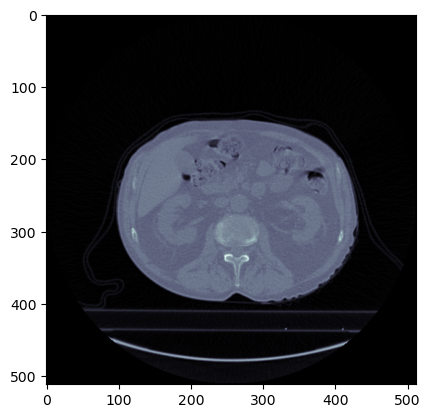

In [4]:
dcm_file = pydicom.dcmread(files[10])

# Visualize the dicom image
fig = plt.figure()
plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)

# plt.savefig('im.jpg')

In [6]:
monai.networkQKRB-WDXBs.nets.

<module 'monai.networks.nets' from '/home/artin/miniconda3/envs/xnat/lib/python3.9/site-packages/monai/networks/nets/__init__.py'>

# Applying transformations using monai library

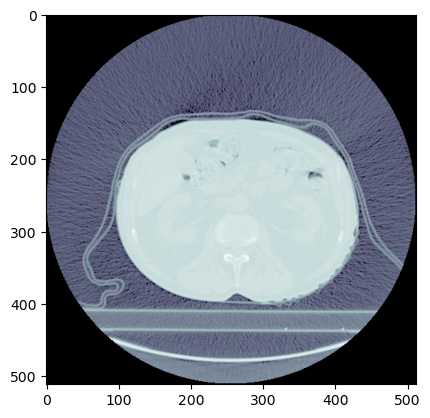

In [ ]:
im = dcm_file.pixel_array 

from monai.transforms import AdjustContrast
adjuster = AdjustContrast(.2)
im2 = adjuster(im)
plt.imshow(im2, cmap=plt.cm.bone)

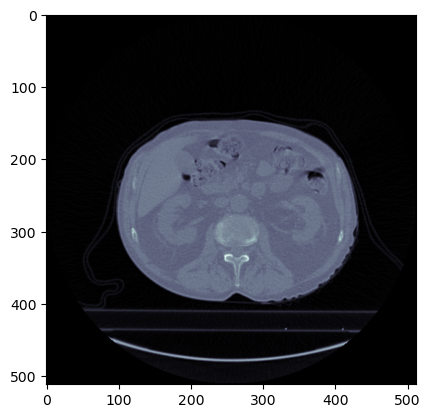

In [ ]:
dataset = pydicom.Dataset(pixel_array=im2) 
dcm_file.update(dataset)
plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)

In [ ]:
new_path = URI.parent.joinpath(URI.stem + '_adjusted' + URI.suffix)

pydicom.dcmwrite(new_path, dcm_file)

# Connecting to XNAT's REST API 

In [ ]:
import pyxnat
mode = 'jupyterhub_service'
server_dict = dict(local='http://localhost:80' , jupyterhub_service='http://xnat-web:8080')
interface = pyxnat.Interface(server=server_dict[mode], user='admin', password='admin')

## setting the project

In [ ]:
projects_list = list(interface.select.projects())

project_index = 0
project_ID = projects_list[project_index].id()
project = interface.select.project(project_ID)

if not project.exists():
    project.insert()

In [ ]:
project.users()

['admin']

In [ ]:
project.resource('DICOM')

<Resource Object> DICOM

## Setting the subject

In [ ]:
subjects = list(project.subjects())
subject_ID = subjects[0].id()
subject = project.subject(subject_ID)

if not subject.exists():
    subject.insert()

## Setting the experiment

In [ ]:
inter

[<Experiment Object> XNAT_E00001 `LUNG1-001` (subject: XNAT_S00001 `LUNG1-001`) (project: project) 1 scan 0 resource (created on 2023-05-02 23:29:29.672) http://xnat-web:8080/data/projects/project/subjects/XNAT_S00001/experiments/XNAT_E00001?format=html]

In [ ]:
experiment_index = 0
experiment_id = list(subject.experiments())[experiment_index].id()


experiment = subject.experiment(experiment_id)
print('experiment:',experiment)

if not experiment.exists():
    experiment.create(experiments='xnat:ctSessionData')

experiment: <Experiment Object> XNAT_E00001 `LUNG1-001` (subject: XNAT_S00001 `LUNG1-001`) (project: project) 1 scan 0 resource (created on 2023-05-02 23:29:29.672) http://xnat-web:8080/data/projects/project/subjects/XNAT_S00001/experiments/XNAT_E00001?format=html


### Setting attributes on the experiment

In [ ]:
experiment.attrs.mset({
    'xnat:mrSessionData/coil' : 'head',
    'xnat:mrSessionData/marker' : 'right',
})

### Adding a scan to the experiment

In [ ]:
scan = experiment.scan('NewScan')

# if not scan.exists():
#     scan.create(scans='xnat:ctScanData')

## Import the DICOM data

In [ ]:
scans = list(experiment.scans())

scan_index = 0
scan = scans[scan_index]
scan

<Scan Object> 0 (`unknown` 134 frames) usable http://xnat-web:8080/data/projects/project/subjects/XNAT_S00001/experiments/XNAT_E00001/scans/0?format=html

In [ ]:
experiments

NameError: name 'experiments' is not defined